In [ ]:
import math
import random
import numpy
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets
import numpy as np

**Exercise 1:**

In [ ]:
def coin_tosses(number, random_seed=0):    
    if random_seed != 0:
        random.seed(random_seed)
        np.random.seed(random_seed)

    return [np.random.randint(0, 2) * 2 - 1 for x in range(number)]


def rademacher_estimate(dataset, hypothesis_generator, act, num_samples=5000, random_seed=0):
    total = list()

    for ii in range(num_samples):
        if random_seed != 0:
            rademacher = coin_tosses(len(dataset), random_seed + ii)
        else:
            rademacher = coin_tosses(len(dataset))

        total.append(max([h.correlation(dataset, rademacher,act) for h in list(hypothesis_generator(dataset))]))

    return sum(total) / num_samples

  

In [ ]:
class network_nn(nn.Module):
  def __init__(self,activiation_func):
    super(network_nn, self).__init__()
    self.layer1 = nn.Linear(2,2,dtype = torch.float)
    self.activiation_func = activiation_func
    self.layer2 = nn.Linear(2,1,dtype = torch.float)
    std = 1
    mean = 1
    nn.init.normal_(self.layer1.weight, mean, std)
    nn.init.normal_(self.layer1.bias, mean, std)
    nn.init.normal_(self.layer2.weight, mean, std)
    nn.init.normal_(self.layer2.bias, mean, std)

  def forward(self, x):
    x = self.layer1(x)
    if self.activiation_func == 'relu':
      x = torch.relu(x)
    elif self.activiation_func == 'tanH':
      x = torch.tanh(x)
    x = self.layer2(x)
    return torch.sign(x)

In [ ]:
class Classifier():

    def classify(self, point, actviation):
        network = network_nn(actviation)
        return network(point)

    def correlation(self, data, labels, kind):
        assert len(data) == len(labels)
        assert all(x == 1 or x == -1 for x in labels)

        predicted = [(self.classify(d, kind)) for d in data]
        
        return float(np.dot(predicted, labels)) / float(len(data))

def hypotheses(dataset):
  for i in range(500):
    yield Classifier()

In [ ]:
all_data = torch.tensor([[1, 1], [2, 2], [3, 0], [4, 2]], dtype=torch.float)
print("Rademacher Complexity with no activation:"+str(rademacher_estimate(all_data, hypotheses, 'no')))
print("Rademacher Complexity with ReLu activation:"+str(rademacher_estimate(all_data, hypotheses, 'relu')))
print("Rademacher Complexity with Tanh activation:"+str(rademacher_estimate(all_data, hypotheses, 'tanh')))

Rademacher Complexity with no activation:0.865
Rademacher Complexity with ReLu activation:0.847
Rademacher Complexity with Tanh activation:0.866


**Exercise 2:**

In [ ]:
import matplotlib.pyplot as plt
import sklearn

In [ ]:
def rmse(m,se):
  inputs = numpy.array([np.random.normal(0,1,100) for i in range(m)]) ## 50000 X 100
  test = np.array([np.random.normal(0,1,100) for i in range(10000)]) ## 10000 X 100
  w = np.linalg.norm(np.random.uniform(0,1,100))
  noise_train = [np.random.normal(0,se,100) for i in range(m)]
  noise_test = [np.random.normal(0,se,100) for i in range(10000)]

  labels = inputs.dot(w) + noise_train
  w_est  = torch.linalg.lstsq(torch.from_numpy(inputs),torch.from_numpy(labels))[0]
  predictions = test.dot(w_est)+noise_test
  predictions = torch.from_numpy(predictions)
  real_values = torch.from_numpy(test.dot(w)+noise_test)
  noise = torch.sqrt(((torch.sign(predictions) - torch.sign(real_values)) ** 2).mean())
  return noise

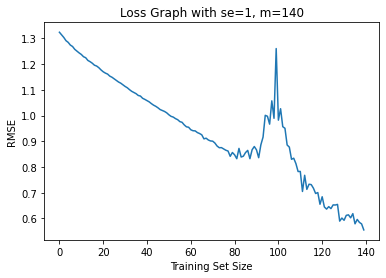

In [ ]:
plot_loss(1)

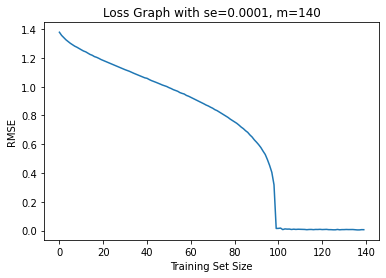

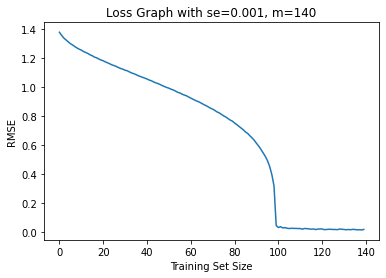

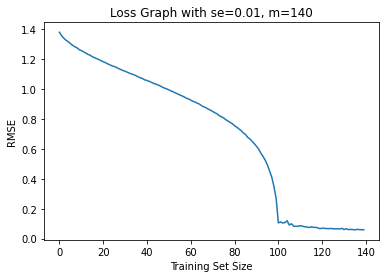

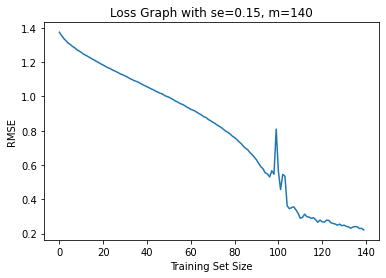

In [ ]:
def plot_loss(se):
  test_loss = []
  for i in range(140):
    cur = rmse(i+1,se)
    test_loss.append(cur)
  plt.plot(test_loss)
  plt.ylabel('RMSE')
  plt.xlabel('Training Set Size')
  plt.title('Loss Graph with se='+str(se)+', m='+str(140))
  plt.show()
list = [0.0001,0.001,0.01,0.15]
for i in list:
  plot_loss(i)